In [1]:
! git clone https://github.com/Ironarrow98/Bcell_data

Cloning into 'Bcell_data'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [2]:
! ls

Bcell_data  sample_data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

bcell = pd.read_csv("/content/Bcell_data/input_bcell.csv")
sars = pd.read_csv("/content/Bcell_data/input_sars.csv")
# covid = pd.read_csv("input_covid.csv")

bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


Text(0.5, 1.0, 'Target frequency: SARS')

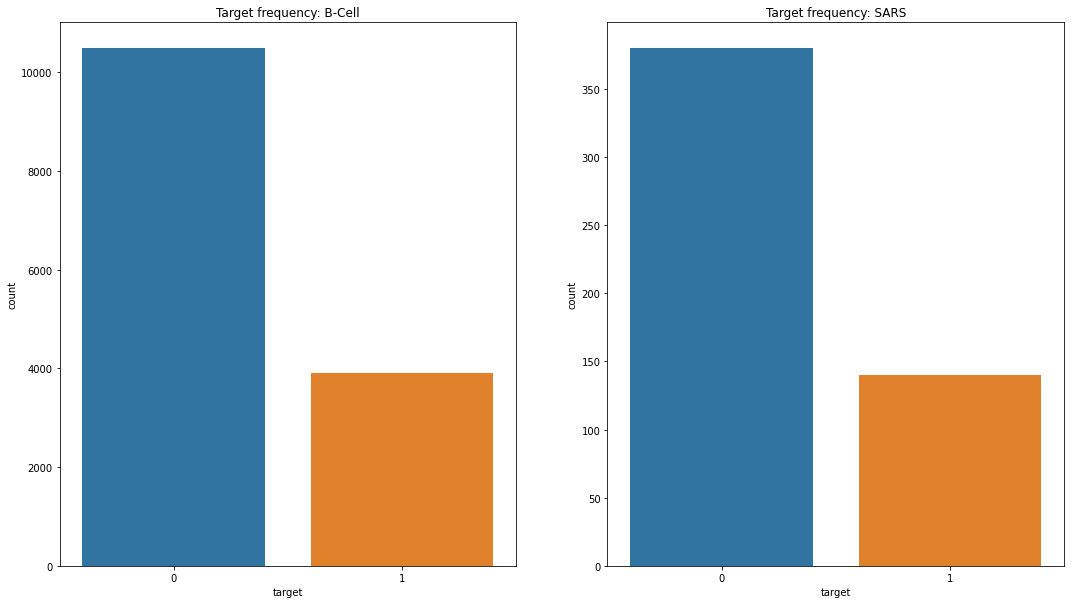

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (18, 10))

sns.countplot(data = bcell, x = "target", ax = axes[0])
axes[0].set_title('Target frequency: B-Cell')

sns.countplot(data = sars, x = "target", ax = axes[1])
axes[1].set_title('Target frequency: SARS')

In [7]:
bcell.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [8]:
sars.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

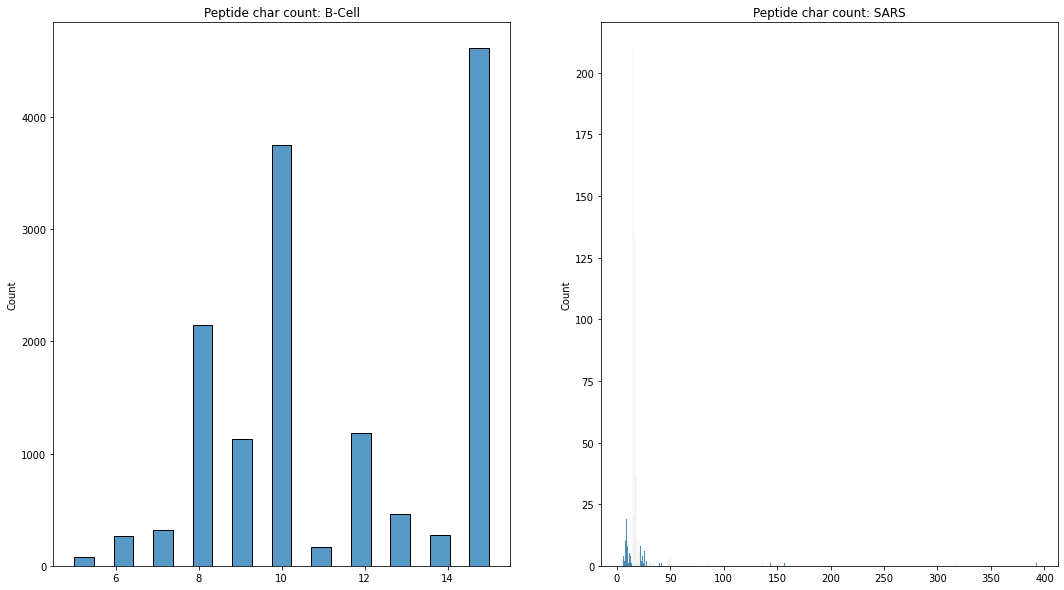

In [9]:
# Length of sequence in train data.
bcell['seq_char_count']= bcell['protein_seq'].apply(lambda x: len(x))
bcell['pep_char_count']= bcell['peptide_seq'].apply(lambda x: len(x))
sars['pep_char_count']= sars['peptide_seq'].apply(lambda x: len(x))

fig, axes = plt.subplots(1, 2, figsize = (18, 10))

sns.histplot(bcell['pep_char_count'].values, ax = axes[0])
axes[0].set_title('Peptide char count: B-Cell')

sns.histplot(sars['pep_char_count'].values, ax = axes[1])
axes[1].set_title('Peptide char count: SARS')

plt.show()

Codes: B-Cell
Total unique codes: 20
Codes: SARS
Total unique codes: 20


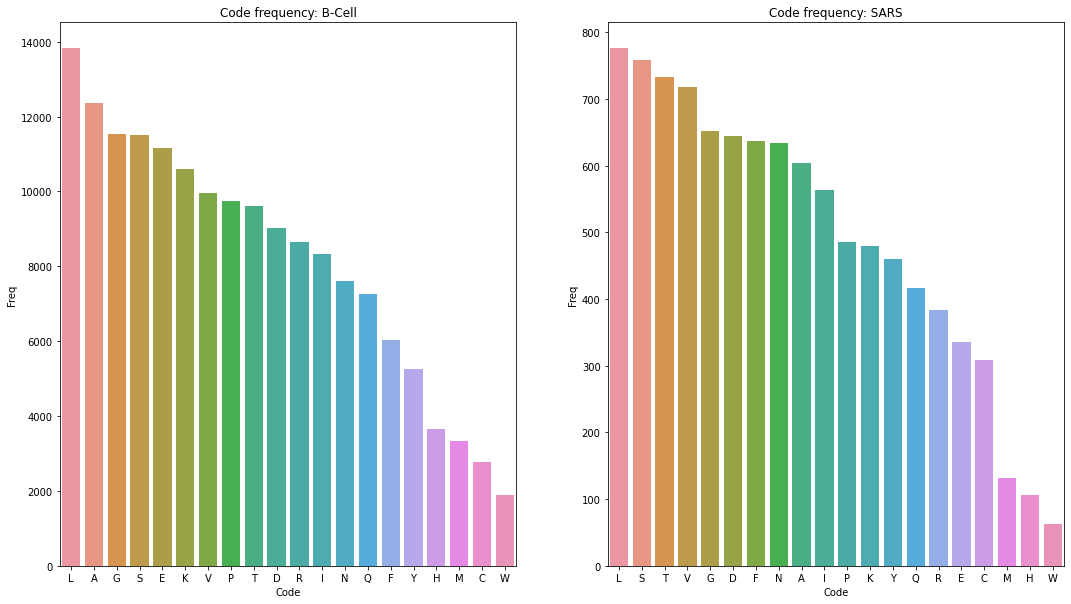

In [10]:
from collections import Counter

def get_code_freq(df, data_name):
  df = df.apply(lambda x: " ".join(x))
  codes = []
  for i in df: # concatination of all codes
    codes.extend(i)

  codes_dict= Counter(codes)
  codes_dict.pop(' ') # removing white space
  print(f'Codes: {data_name}')
  print(f'Total unique codes: {len(codes_dict.keys())}')
  df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]
  
# B-Cell peptide sequence
bcell_freq = get_code_freq(bcell['peptide_seq'], 'B-Cell')

# SARS peptide sequence
sars_freq = get_code_freq(sars['peptide_seq'], 'SARS')


fig, axes = plt.subplots(1, 2, figsize = (18, 10))

sns.barplot(x='Code', y='Freq', data = bcell_freq, ax = axes[0])
axes[0].set_title('Code frequency: B-Cell')

sns.barplot(x='Code', y='Freq', data = sars_freq, ax = axes[1])
axes[1].set_title('Code frequency: SARS')

plt.show()